# Презентация проекта и начало работы

https://gamma.app/docs/-5exizza9enwh52g – попросила Gamma сгенерировать шаблон презентации для подобного проекта, дальше редактирую ручками именно под нашу идею и реализацию. *Примечание:* на момент дропа этого файла на платформу презентация еще не доделана, она в процессе, но предварительные результаты работы есть в этом колаб файле :)

In [ ]:
!pip install palettable
!pip install dash==2.18.2
!pip install dash-bootstrap-components==1.7.1
!pip install wordcloud matplotlib # я захотела сделать облако слов, насколько я помню, на курсе мы этого не обсуждали, так что я спросила у гпт, как это лучше сделать

In [ ]:
# вытаскиваю все возможные импорты чтобы дальше не думать об этом
import urllib, requests, socket, re, lxml, io, bs4, sqlite3, pandas, sqlalchemy
from requests.compat import urljoin, quote_plus, urlparse, unquote
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
import re
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# **Маркетинговая стратегия. Поиск суперзвезды.**

Одна из основных стратегий продвижения нашей команды – коллабы со знаменитыми волейболистами и волейбольными командами. В этом файле – процесс обработки информации об этом: таблица с показателями спортсменов и ее дальнейшая визуализация (она пока в процессе :) но тоже скоро здесь появится). Также я подумала, что так как мы работаем с командами, + фанаты часто болеют за конкретные команды, надо сделать анализ того, с какими командами можно коллабиться. Для этого я для каждого спортсмена из таблицы захожу на его страницу и вытаскиваю инфу о клубе, в котором он играет (гистограмма для этой штуки тоже скоро появится). При разработке кода если долго не могла найти ошибку, консультировалась с чатомГПТ, что могло пойти не так, или просила совета у сокомандников.

Анализ рейтингов профессиональной лиги: здесь хотим найти лучших волейболистов, чтобы рассмотреть возможность делать коллабы с ними. Аналогично хоти посмотреть на крутые команды и количество топ-игроков в них.

In [ ]:
url = 'https://volley.ru/calendar/01J1VV7JAR7KZS011D2BDE00D5/statistics'
response = requests.get(url)
encoding = chardet.detect(response.content)['encoding']
html = response.content.decode(encoding)
soup = BeautifulSoup(html, 'lxml')

# достаем имена
html_names = soup.find_all('td', {'data-field': 'name'})
names = []
for i in html_names:
  new_soup = BeautifulSoup(str(i), 'lxml')
  s = new_soup.find_all('a')
  names.append(s[0].text)

# результаты подач
html_serves = soup.find_all('td', {'data-field': 'total_serve_point'})
serves = []
for i in html_serves[1:]:
  serves.append(i.text)

# процент отличных приемов
html_digs = soup.find_all('td', {'class': 'stat-table-5', 'data-field': 'total_receive_excellent'})
digs = []
for i in html_digs[1:]:
  new_soup = BeautifulSoup(str(i), 'lxml')
  s = new_soup.find_all('span', {'class': 'ts-table__active-cell'})
  if s != []:
    s = s[0].text
    if '%' in s:
      s = s[:len(i) - 1]
    if '+' in s:
      s = s[1:]
    digs.append(s)
  else:
    digs.append('0')

# процент эффективных атак
html_hits = soup.find_all('td', {'class': 'stat-table-6', 'data-field': 'total_attack_point_percent'})
hits = []
for i in html_hits[1:]:
  new_soup = BeautifulSoup(str(i), 'lxml')
  s = new_soup.find_all('span', {'class': 'ts-table__active-cell'})
  if s != []:
    s = s[0].text
    if '%' in s:
      s = s[:len(i) - 1]
    if '+' in s:
      s = s[1:]
    hits.append(s)
  else:
    hits.append('0')

# очки на блоке
html_blocks = soup.find_all('td', {'class': 'stat-table-7', 'data-field': 'total_block'})
blocks = []
for i in html_blocks[1:]:
  new_soup = BeautifulSoup(str(i), 'lxml')
  s = new_soup.find_all('span', {'class': 'ts-table__active-cell'})
  if s != []:
    s = s[0].text
    if '%' in s:
      s = s[:len(i) - 1]
    if '+' in s:
      s = s[1:]
    blocks.append(s)
  else:
    blocks.append('0')

print(names)

# переведем все строки в числа, чтобы потом хорошо с ними работалось
sserves = []
for i in range(len(names)):
    sserves.append(int(serves[i]))
print(sserves)

ddigs = []
for i in range(len(names)):
    ddigs.append(int(digs[i]))
print(ddigs)

hhits = []
for i in range(len(names)):
    hhits.append(int(hits[i]))
print(hhits)

bblocks = []
for i in range(len(names)):
    bblocks.append(int(blocks[i]))
print(bblocks)


summ = []
for i in range(len(names)):
    summ.append(int(serves[i])+int(digs[i])+int(hits[i])+int(blocks[i]))
print(summ)

['Бабкевич Владислав', 'Железняков Павел', 'Мурашко Роман', 'Сурмачевский Андрей', 'Сиденко Егор', 'Тетюхин Павел', 'Дмитриев Семен', 'Папазов Виталий', 'Капранов Василий', 'Пакшин Роман', 'Мергарехо Осниель', 'Янт Марлон', 'Хлякин Михаил', 'Аль Хачдади Мохамед', 'Зубов Николай', 'Волков Дмитрий', 'Авдоченко Павел', 'Сапожков Максим', 'Поталюк Роман', 'Соколов Цветан', 'Рыбаков Евгений', 'Казаченков Илья', 'Дикарев Виталий', 'Маркин Александр', 'Фиэль Родригес Давид', 'Морозов Никита', 'Лызик Дмитрий', 'Ивович Марко', 'Чжан Цзинъинь', 'Воронков Федор', 'Курбанов Омар', 'Родичев Алексей', 'Заболотников Георгий', 'Бочаров Максим', 'Урсов Кирилл', 'Лабинский Михаил', 'Клец Кирилл', 'Богдан Денис', 'Клюка Егор', 'Сподобец Илья', 'Захватенков Александр', 'Крсманович Петар', 'Шахбанмирзаев Ражабдибир', 'Пискарев Иван', 'Эннс Корней', 'Пипуныров Матвей', 'Масько Артем', 'Шкулявичус Романас', 'Подлесных Ярослав', 'Максимов Антон', 'Пятыркин Александр', 'Бирюков Денис', 'Жук Дмитрий', 'Куркаев 

In [ ]:
# строю гистограмму по этим данным
mpldf = pd.DataFrame({
    'Игрок': names,
    'Подачи': sserves,
    'Приемы': ddigs,
    'Атаки': hhits,
    'Блоки': bblocks

})
mpldf.index = mpldf.index + 1
#topmpldf = mpldf[:231] # чтобы не утонуть в данных, смотрю только среди топов, дальше показатели похуже
# я построила графики и поняла, что это очень криво смотрится, если не отсортировано
mpldf['Сумма'] = summ
smpldf = mpldf.sort_values(by='Сумма', ascending=False)
smpldf = smpldf[:231]
smpldf

,Игрок,Подачи,Приемы,Атаки,Блоки,Сумма
4,Сурмачевский Андрей,70,18,46,56,190
25,Фиэль Родригес Давид,16,27,60,78,181
23,Дикарев Виталий,20,13,54,86,173
27,Лызик Дмитрий,43,20,60,49,172
42,Крсманович Петар,27,27,61,56,171
...,...,...,...,...,...,...
257,Мартынюк Роман,0,5,0,0,5
188,Жось Роман,3,0,0,1,4
207,Ковалев Егор,0,3,0,0,3
199,Иванов Илья,0,0,0,1,1


In [ ]:
# код с лекции
fig1 = px.bar(smpldf, x='Игрок', y='Сумма',
             labels={'Сумма': 'Сумма показателей', 'Игрок': 'Имя игрока'},
             hover_data=['Подачи', 'Приемы', 'Атаки', 'Блоки'],
             title='Сумма основных показателей среди профессиональных игроков (мужчины)',
             color_discrete_sequence=px.colors.sequential.YlOrRd_r,
             #color='Игрок'
             )
fig1.show() # взяла всех, кроме нулевых сумм

# Поиск крутых клубов по топ-игрокам (мужчины):

*И здесь, и для женщин, я беру выборку из топ-60 игроков, чтобы смотреть клубы по ним (изначально в датасете мужчин 258, женщин – 232).*

In [ ]:
url = 'https://volley.ru/calendar/01J1VV7JAR7KZS011D2BDE00D5/statistics'
response = requests.get(url)
encoding = chardet.detect(response.content)['encoding']
html = response.content.decode(encoding)
soup = BeautifulSoup(html, 'lxml')

tables = soup.find_all('table')
ssylki = []

hrefs = tables[0].find_all('a')
for hre in hrefs:
 hre = str(hre) # вытащили список ссылок на страницы игроков
 index = hre.find('>')
 #print('https://volley.ru' + str(hre[9:44])) # сделали их корректными ссылками
 ssylki.append('https://volley.ru' + str(hre[9:44]))
ssylki # получили в адекватном виде список ссылкок

['https://volley.ru/players/01FQH659A2PK7V0G7YHJPT1YBC',
 'https://volley.ru/players/01GWJ7ZMYRQM2Q0ZYKW2D31XMM',
 'https://volley.ru/players/01GGF1PDDKN6T00C0FQCWP0XGT',
 'https://volley.ru/players/01GGEWNTA0VGWC0V7RP4RJ0N00',
 'https://volley.ru/players/01GWJ89PS8KYYM1754Z3YZ1AFK',
 'https://volley.ru/players/01GGF1P8C91MAT0XTVECGS1YB8',
 'https://volley.ru/players/01GGCHA2NARQR70SF6NRYH001X',
 'https://volley.ru/players/01GGF39QXSE3R01PNFN7YM0HFF',
 'https://volley.ru/players/01GDFYY2HZYVA11EYCBV3A0NJA',
 'https://volley.ru/players/01G79HKA0SXWBZ0QEY9NFF0G9R',
 'https://volley.ru/players/01J5N83Q6DHKK00RM0QD3N1E4F',
 'https://volley.ru/players/01J5RF7GKKKY350CT277Y21MP7',
 'https://volley.ru/players/01GGF0FDYZ6GY2193ZQ0WH0S4F',
 'https://volley.ru/players/01H8BFG11A3H0G0EJCZBF01DYB',
 'https://volley.ru/players/01GGEQ790MDQ0H12HMKNJ00QJ9',
 'https://volley.ru/players/01GGF03M3DD1B618EGJGWW1GR2',
 'https://volley.ru/players/01H8BFG1199F1R0THFHRKV0JE8',
 'https://volley.ru/players/01H

In [ ]:
clubs = [] # в этой ячейке мы сделали список клубов сооответственно игрокам

for i in range(60):
  ssylka = ssylki[i]
  response = requests.get(ssylka)
  encoding = chardet.detect(response.content)['encoding']
  html = response.content.decode(encoding)
  soup = BeautifulSoup(html, 'lxml')
  html_urls = soup.find_all('a', {'class': 'itext-40'})
  # print(html_urls[0].text)
  clubs.append(html_urls[0].text)

In [ ]:
# хочу список клубов словарем, где ключ -- название, а значение -- количество повторений: дальше мы с этой инфой будем строить графики
clubs_dict = {}
for item in clubs:
    if item in clubs_dict:
        clubs_dict[item] += 1
    else:
        clubs_dict[item] = 1
print(clubs_dict)

{' Зенит, Санкт-Петербург': 5, ' АСК, Нижний Новгород': 4, ' Енисей, Красноярск': 4, ' Динамо-Урал, Уфа': 5, ' Кузбасс, Кемерово': 4, '  Белогорье, Белгород': 4, ' Газпром-Югра, Сургут': 3, ' Факел Ямал, Новый Уренгой': 5, '  Динамо-ЛО, Ленинградская обл.': 4, ' Оренбуржье, Оренбург': 3, ' МГТУ, Москва': 2, '  Зенит-Казань, Казань': 4, ' Динамо, Москва': 6, '  Нова, Новокуйбышевск': 1, ' Локомотив, Новосибирск': 6}


Визуализация рейтинга клубов:

**Аналогично для женщин:**

In [ ]:
url = 'https://volley.ru/calendar/01J1YDG9TCC2MJ1RN5WM6H04C6/statistics'
response = requests.get(url)
encoding = chardet.detect(response.content)['encoding']  # определяем кодировку
html = response.content.decode(encoding)  # декодируем с норм кодировкой
soup = BeautifulSoup(html, 'lxml')

# достаем имена
html_wnames = soup.find_all('td', {'data-field': 'name'})

wnames = []
for i in html_wnames:
  new_soup = BeautifulSoup(str(i), 'lxml')
  s = new_soup.find_all('a')
  wnames.append(s[0].text)

# результаты подач
html_wserves = soup.find_all('td', {'data-field': 'total_serve_point'})

wserves = []
for i in html_wserves[1:]:
  wserves.append(i.text)

# процент отличных приемов
html_wdigs = soup.find_all('td', {'class': 'stat-table-5', 'data-field': 'total_receive_excellent'})
wdigs = []
for i in html_wdigs[1:]:
  new_soup = BeautifulSoup(str(i), 'lxml')
  s = new_soup.find_all('span', {'class': 'ts-table__active-cell'})
  if s != []:
    s = s[0].text
    if '%' in s:
      s = s[:len(i) - 1]
    if '+' in s:
      s = s[1:]
    wdigs.append(s)
  else:
    wdigs.append('0')

# процент эффективных атак
html_whits = soup.find_all('td', {'class': 'stat-table-6', 'data-field': 'total_attack_point_percent'})
whits = []
for i in html_whits[1:]:
  new_soup = BeautifulSoup(str(i), 'lxml')
  s = new_soup.find_all('span', {'class': 'ts-table__active-cell'})
  if s != []:
    s = s[0].text
    if '%' in s:
      s = s[:len(i) - 1]
    if '+' in s:
      s = s[1:]
    whits.append(s)
  else:
    whits.append('0')

# очки на блоке
html_wblocks = soup.find_all('td', {'class': 'stat-table-7', 'data-field': 'total_block'})

wblocks = []
for i in html_wblocks[1:]:
  new_soup = BeautifulSoup(str(i), 'lxml')
  s = new_soup.find_all('span', {'class': 'ts-table__active-cell'})
  if s != []:
    s = s[0].text
    if '%' in s:
      s = s[:len(i) - 1]
    if '+' in s:
      s = s[1:]
    wblocks.append(s)
  else:
    wblocks.append('0')

print(wnames)

# переведем все строки в числа, чтобы потом хорошо с ними работалось
wsserves = []
for i in range(len(wnames)):
    wsserves.append(int(wserves[i]))
print(wsserves)

wddigs = []
for i in range(len(wnames)):
    wddigs.append(int(wdigs[i]))
print(wddigs)

whhits = []
for i in range(len(wnames)):
    whhits.append(int(whits[i]))
print(whhits)

wbblocks = []
for i in range(len(wnames)):
    wbblocks.append(int(wblocks[i]))
print(wbblocks)


wsumm = []
for i in range(len(wnames)):
    wsumm.append(int(wserves[i])+int(wdigs[i])+int(whits[i])+int(wblocks[i]))
print(wsumm)

['Каракурт Эбрар', 'Бирюкова Ольга', 'Гончарова Наталия', 'Гарелик Анастасия', 'Боговская Мария', 'Чернова Анастасия', 'Мартинес Брайелин', 'Воронкова Ирина', 'Руссу Виктория', 'Богданова Алина', 'Касаткина Нина', 'Коржова Владислава', 'Распутина Валерианна', 'Фитисова Елизавета', 'Боброва Виктория', 'Симонова Карина', 'Геращенкова Екатерина', 'Карполь Елизавета', 'Романова Валерия', 'Мазина Елизавета', 'Смирнова Надежда', 'Тица Бранка', 'Гатина Светлана', 'Селиверстова Наталья', 'Лазарева Ангелина', 'Мамедова Александра', 'Гатина Екатерина', 'Халецкая Мария', 'Пушина Виктория', 'Воробьева Мария', 'Столбова Юлия', 'Храбрая Юлия', 'Костючик Вера', 'Лебедкина Ксения', 'Симоненко Ярослава', 'Мельникова Анна', 'Ковалева Полина', 'Жаброва Анастасия', 'Сергеева Варвара', 'Столяр Надежда', 'Ваганова Ольга', 'Сокольчик Екатерина', 'Беликова Полина', 'Емелина Ангелина', 'Павлова Елизавета', 'Антонова Вера', 'Лукьянова Елизавета', 'Шевчук Валерия', 'Гонсалес Гайла', 'Синицкая Юлия', 'Протопопова

In [ ]:
wpldf = pd.DataFrame({
    'Игрок': wnames,
    'Подачи': wsserves,
    'Приемы': wddigs,
    'Атаки': whhits,
    'Блоки': wbblocks

})
wpldf.index = wpldf.index + 1
wpldf['Сумма'] = wsumm
wpldf = wpldf.sort_values(by='Сумма', ascending=False)
wpldf = wpldf[:191]
wpldf

,Игрок,Подачи,Приемы,Атаки,Блоки,Сумма
29,Пушина Виктория,8,40,51,124,223
25,Лазарева Ангелина,27,14,47,123,211
18,Карполь Елизавета,16,21,50,114,201
38,Жаброва Анастасия,11,30,48,98,187
36,Мельникова Анна,20,14,46,101,181
...,...,...,...,...,...,...
202,Рахматуллина Милина,0,16,0,0,16
224,Станкевичуте Анастасия,0,12,0,0,12
157,Чирович Александра,1,0,0,5,6
159,Дворникова Мария Николь,1,0,0,1,2


In [ ]:
# код с лекции
fig2 = px.bar(wpldf, x='Игрок', y='Сумма',
             labels={'Сумма': 'Сумма показателей', 'Игрок': 'Имя игрока'},
             hover_data=['Подачи', 'Приемы', 'Атаки', 'Блоки'],
             title='Сумма основных показателей среди профессиональных игроков (женщины)',
             color_discrete_sequence=px.colors.sequential.RdPu_r,
             #color='Игрок'
             )
fig2.show() # взяла всех, кроме нулевых сумм

# Поиск топ клубов (женщины):

In [ ]:
url = 'https://volley.ru/calendar/01J1YDG9TCC2MJ1RN5WM6H04C6/statistics'
response = requests.get(url)
encoding = chardet.detect(response.content)['encoding']
html = response.content.decode(encoding)
soup = BeautifulSoup(html, 'lxml')

tables = soup.find_all('table')
wssylki = []

whrefs = tables[0].find_all('a')
for whre in whrefs:
 whre = str(whre) # вытащили список ссылок на страницы игроков
 windex = whre.find('>')
 #print('https://volley.ru' + str(hre[9:44])) # сделали их корректными ссылками
 wssylki.append('https://volley.ru' + str(whre[9:44]))

wclubs = []
for i in range(60):
  wssylka = wssylki[i]
  response = requests.get(wssylka)
  encoding = chardet.detect(response.content)['encoding']
  html = response.content.decode(encoding)
  soup = BeautifulSoup(html, 'lxml')
  html_urls = soup.find_all('a', {'class': 'itext-40'})
  wclubs.append(html_urls[0].text)

In [ ]:
wclubs_dict = {}
for item in wclubs:
    if item in wclubs_dict:
        wclubs_dict[item] += 1
    else:
        wclubs_dict[item] = 1
print(wclubs_dict)

{' Локомотив, Калининградская обл.': 3, ' Заречье-Одинцово, Московская обл.': 5, '  Динамо-Москва': 5, ' Ленинградка, Санкт-Петербург': 4, ' Динамо, Краснодар': 5, ' Динамо-Ак Барс, Казань': 4, ' Динамо-Метар, Челябинск': 5, ' Минчанка': 4, ' Омичка, Омская обл.': 3, ' Енисей, Красноярск': 4, ' Уралочка-НТМК, Свердловская обл.': 6, ' Тулица, Тульская обл.': 5, ' Спарта, Нижний Новгород': 4, '  Протон, Саратов': 3}


In [ ]:
# еще хочу такой график и для женщин, и для мужчин. сделаем общий словарь и аналогичные штуки для графиков:
totalclubs = clubs + wclubs
totalclubs_dict = {}
for item in totalclubs:
    if item in totalclubs_dict:
        totalclubs_dict[item] += 1
    else:
        totalclubs_dict[item] = 1
print(totalclubs_dict)

{' Зенит, Санкт-Петербург': 5, ' АСК, Нижний Новгород': 4, ' Енисей, Красноярск': 8, ' Динамо-Урал, Уфа': 5, ' Кузбасс, Кемерово': 4, '  Белогорье, Белгород': 4, ' Газпром-Югра, Сургут': 3, ' Факел Ямал, Новый Уренгой': 5, '  Динамо-ЛО, Ленинградская обл.': 4, ' Оренбуржье, Оренбург': 3, ' МГТУ, Москва': 2, '  Зенит-Казань, Казань': 4, ' Динамо, Москва': 6, '  Нова, Новокуйбышевск': 1, ' Локомотив, Новосибирск': 6, ' Локомотив, Калининградская обл.': 3, ' Заречье-Одинцово, Московская обл.': 5, '  Динамо-Москва': 5, ' Ленинградка, Санкт-Петербург': 4, ' Динамо, Краснодар': 5, ' Динамо-Ак Барс, Казань': 4, ' Динамо-Метар, Челябинск': 5, ' Минчанка': 4, ' Омичка, Омская обл.': 3, ' Уралочка-НТМК, Свердловская обл.': 6, ' Тулица, Тульская обл.': 5, ' Спарта, Нижний Новгород': 4, '  Протон, Саратов': 3}


Дальше строим круговые диаграммы для клубов, у которых несколько игроков входит в топ-60. Хочу посмотреть, какие клубы входят в топ, и насколько равномерное между ними распределение.

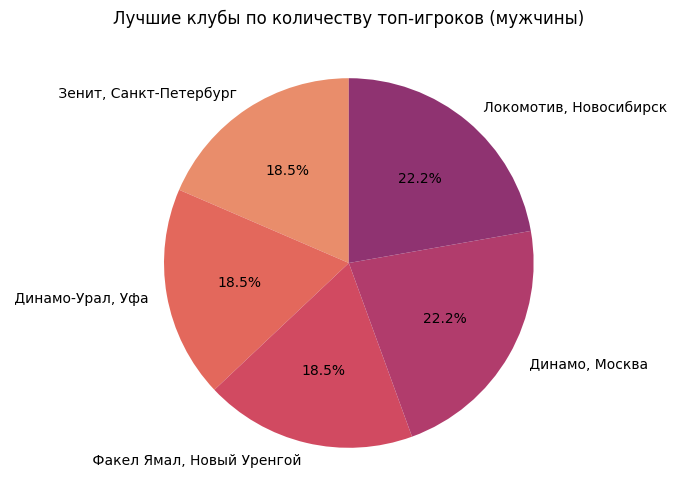

                      Команда  Игроки
0      Зенит, Санкт-Петербург       5
1            Динамо-Урал, Уфа       5
2   Факел Ямал, Новый Уренгой       5
3              Динамо, Москва       6
4      Локомотив, Новосибирск       6


In [ ]:
dfmen = pd.DataFrame.from_dict(clubs_dict, orient='index', columns=['Игроки'])
filtered_dfmen = dfmen.drop(dfmen[dfmen['Игроки'] < 5].index)
#print(filtered_dfmen)
plt.figure(figsize=(8, 6))
plt.pie(filtered_dfmen['Игроки'], labels=filtered_dfmen.index, autopct='%1.1f%%', startangle=90, colors = sns.color_palette('flare'))
plt.title('Лучшие клубы по количеству топ-игроков (мужчины)')
plt.show()
filtered_dfmen = pd.DataFrame(filtered_dfmen).reset_index()
filtered_dfmen.columns = ['Команда', 'Игроки']
print(filtered_dfmen)

In [ ]:
dfwomen = pd.DataFrame.from_dict(wclubs_dict, orient='index', columns=['Игроки'])
filtered_dfwomen = dfwomen.drop(dfwomen[dfwomen['Игроки'] < 5].index)
plt.figure(figsize=(8, 6))
plt.pie(filtered_dfwomen['Игроки'], labels=filtered_dfwomen.index, autopct='%1.1f%%', startangle=90, colors = sns.color_palette('rocket'))
plt.title('Лучшие клубы по количеству топ-игроков (женщины)')
plt.show()
filtered_dfwomen = pd.DataFrame(filtered_dfwomen).reset_index()
filtered_dfwomen.columns = ['Команда', 'Игроки']
print(filtered_dfwomen)

In [ ]:
from palettable import colorbrewer, cubehelix, scientific, cartocolors
print(dir(scientific.sequential))  # чекаем доступные палитры

['Acton_10', 'Acton_10_r', 'Acton_11', 'Acton_11_r', 'Acton_12', 'Acton_12_r', 'Acton_13', 'Acton_13_r', 'Acton_14', 'Acton_14_r', 'Acton_15', 'Acton_15_r', 'Acton_16', 'Acton_16_r', 'Acton_17', 'Acton_17_r', 'Acton_18', 'Acton_18_r', 'Acton_19', 'Acton_19_r', 'Acton_20', 'Acton_20_r', 'Acton_3', 'Acton_3_r', 'Acton_4', 'Acton_4_r', 'Acton_5', 'Acton_5_r', 'Acton_6', 'Acton_6_r', 'Acton_7', 'Acton_7_r', 'Acton_8', 'Acton_8_r', 'Acton_9', 'Acton_9_r', 'Bamako_10', 'Bamako_10_r', 'Bamako_11', 'Bamako_11_r', 'Bamako_12', 'Bamako_12_r', 'Bamako_13', 'Bamako_13_r', 'Bamako_14', 'Bamako_14_r', 'Bamako_15', 'Bamako_15_r', 'Bamako_16', 'Bamako_16_r', 'Bamako_17', 'Bamako_17_r', 'Bamako_18', 'Bamako_18_r', 'Bamako_19', 'Bamako_19_r', 'Bamako_20', 'Bamako_20_r', 'Bamako_3', 'Bamako_3_r', 'Bamako_4', 'Bamako_4_r', 'Bamako_5', 'Bamako_5_r', 'Bamako_6', 'Bamako_6_r', 'Bamako_7', 'Bamako_7_r', 'Bamako_8', 'Bamako_8_r', 'Bamako_9', 'Bamako_9_r', 'Batlow_10', 'Batlow_10_r', 'Batlow_11', 'Batlow_11_r',

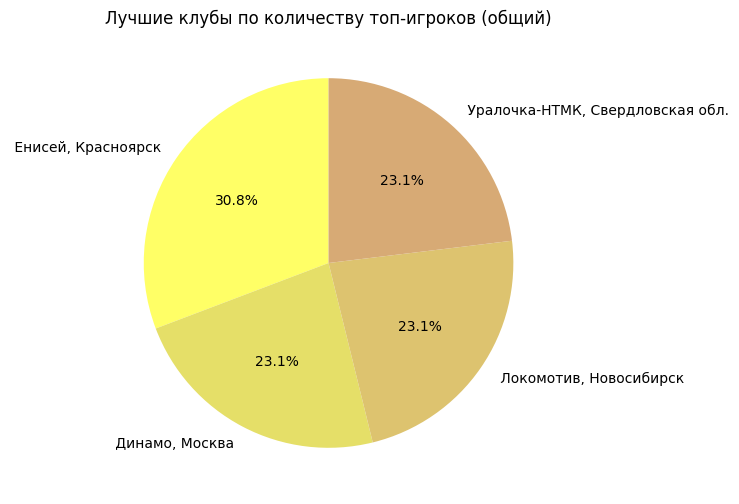

                             Команды  Игроки
0                 Енисей, Красноярск       8
1                     Динамо, Москва       6
2             Локомотив, Новосибирск       6
3   Уралочка-НТМК, Свердловская обл.       6


In [ ]:
dftotal = pd.DataFrame.from_dict(totalclubs_dict, orient='index', columns=['Игроки'])
filtered_dftotal = dftotal.drop(dftotal[dftotal['Игроки'] < 6].index)
# у меня закончились красивые палитры, поэтому я погуглила, как можно добавить другие. я очень хочу, чтобы дашборд по цветам мэтчился с презой
from palettable.scientific.sequential import Buda_10_r
plt.figure(figsize=(8, 6))
plt.pie(filtered_dftotal['Игроки'], labels=filtered_dftotal.index, autopct='%1.1f%%', startangle=90, colors=Buda_10_r.mpl_colors[:len(filtered_dftotal)])
plt.title('Лучшие клубы по количеству топ-игроков (общий)')
plt.show()
filtered_dftotal = pd.DataFrame(filtered_dftotal).reset_index()
filtered_dftotal.columns = ['Команда', 'Игроки']
print(filtered_dftotal)

In [ ]:
# сейчас будем пилить дашборд
!pip install --upgrade plotly
!pip install dash==2.18.2
!pip install dash-bootstrap-components==1.7.1

In [ ]:
# этой ячейке предшествовали два часа попыток нормально запустить дэш и много вопросов Полине. в итоге нас спас ГПТ и немного сайт viktor-komlev.ru, я честно оч старалась
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash(__name__)
app.layout = html.Div([
    html.H1("Статистика по игрокам"),
    dcc.Dropdown(
        id='gender-dropdown',
        options=[
            {'label': 'Женщины', 'value': 'W'},
            {'label': 'Мужчины', 'value': 'M'},
        ],
        value='W'
    ),
    dcc.Graph(id='bar-chart')
    #html.Div(id='output-dropdown')
])

@app.callback(
    Output('bar-chart', 'figure'),
    Input('gender-dropdown', 'value')
)
def update_chart(selected_gender):
    if selected_gender == 'W':
      return fig2
    else:
      return fig1

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
fig = px.pie(
        filtered_dfwomen,
        values='Игроки',
        names='Команда',
        # clr = px.colors.sequential.RdBu
    )
fig.show()
# тут я тестила промежуточные шаги, чтобы понять, в чем была ошибка в дашборде

In [ ]:
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import pandas as pd

app = Dash(__name__)
df = filtered_dfwomen

app.layout = html.Div([
    dcc.Dropdown(
        id='genderteams-dropdown',
        options=[
            {'label': 'Женские команды', 'value': 'WT'},
            {'label': 'Мужские команды', 'value': 'MT'},
            {'label': 'Все команды', 'value': 'T'}
        ],
        value='WT'
    ),
    dcc.Graph(id='teamsbar-chart')
])

@app.callback(
    Output('teamsbar-chart', 'figure'),
    Input('genderteams-dropdown', 'value')
)
def update_chart(selected_dataframe):
    if selected_dataframe == 'WT':
        df = filtered_dfwomen
        title = 'Распределение игроков по женским командам'
        clr = px.colors.sequential.RdBu
    elif selected_dataframe == 'T':
        df = filtered_dftotal
        title = 'Распределение игроков по всем командам'
        clr = px.colors.sequential.RdPu
    else:
        df = filtered_dfmen
        title = 'Распределение игроков по мужским командам'
        clr = px.colors.sequential.YlGnBu
    fig = px.pie(
        df,
        values='Игроки',
        names='Команда',
        title=title,
        color_discrete_sequence=clr
    )
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
from dash import Dash, html, dcc, Input, Output # посоветовалась с дипсиком как лучше объединить два дашборда в один: изначально делала по отдельности, чтобы не отвлекаться на ошибки, связанные с несколькими списками и коллбэками
import plotly.express as px
import pandas as pd

app = Dash(__name__)
app.layout = html.Div([
    html.H1("Статистика по игрокам и командам"),
    html.Div([
        html.H2("Статистика по игрокам"),
        dcc.Dropdown(
            id='gender-dropdown',
            options=[
                {'label': 'Женщины', 'value': 'W'},
                {'label': 'Мужчины', 'value': 'M'},
            ],
            value='W'
        ),
        dcc.Graph(id='bar-chart')
    ]),

    html.Div([
        html.H2("Статистика по командам"),
        dcc.Dropdown(
            id='genderteams-dropdown',
            options=[
                {'label': 'Женские команды', 'value': 'WT'},
                {'label': 'Мужские команды', 'value': 'MT'},
                {'label': 'Все команды', 'value': 'T'}
            ],
            value='WT'
        ),
        dcc.Graph(id='teamsbar-chart')
    ])
])

@app.callback(
    Output('bar-chart', 'figure'),
    Input('gender-dropdown', 'value')
)
def update_chart(selected_gender):
    if selected_gender == 'W':
      return fig2
    else:
      return fig1

@app.callback(
    Output('teamsbar-chart', 'figure'),
    Input('genderteams-dropdown', 'value')
)
def update_teams_chart(selected_dataframe):
    if selected_dataframe == 'WT':
        df = filtered_dfwomen
        title = 'Распределение игроков по женским командам'
        clr = px.colors.sequential.RdBu
    elif selected_dataframe == 'T':
        df = filtered_dftotal
        title = 'Распределение игроков по всем командам'
        clr = px.colors.sequential.RdPu
    else:
        df = filtered_dfmen
        title = 'Распределение игроков по мужским командам'
        clr = px.colors.sequential.YlGnBu
    fig = px.pie(
        df,
        values='Игроки',
        names='Команда',
        title=title,
        color_discrete_sequence=clr
    )
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>



---


# Любительские соревнования:

Здесь хочу поработать с сайтом с рейтингами любительских соревнований, чтобы понять, как дела с волейболом обстоят в разных вузах.

Для женщин:

In [ ]:
url = 'https://mrsss.nagradion.ru/tournament39233'
response = requests.get(url)
encoding = chardet.detect(response.content)['encoding']
html = response.content.decode(encoding)
soup = BeautifulSoup(html, 'lxml')

html_teams = soup.find_all('tr')
teams = []
for i in html_teams[1:11]:
  teams.append(i.text.split()[-2][:-6])
teams # получила список вузов, команды из которых играют в любительской лиге А (женщины)

['ВШЭ',
 'РУТ(МИИТ)',
 'МГСУ',
 'МГАВМиБ-МВА',
 'ГУП',
 'РХТУ',
 'МГАФК',
 'МГПУ',
 'РГУНГ',
 'МИЭТ']

In [ ]:
# простенькая визуализация списка активных студ команд:
# вот это честно плохо представляла как делать, что-то спрашивала у гпт в процессе

from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = " ".join(teams)

wordcloud = WordCloud(
    width=400,
    height=200,
    background_color='white',
    colormap='plasma',
    margin=5,
    font_path=None,
).generate(text)

plt.figure(figsize=(25, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

KeyboardInterrupt: 

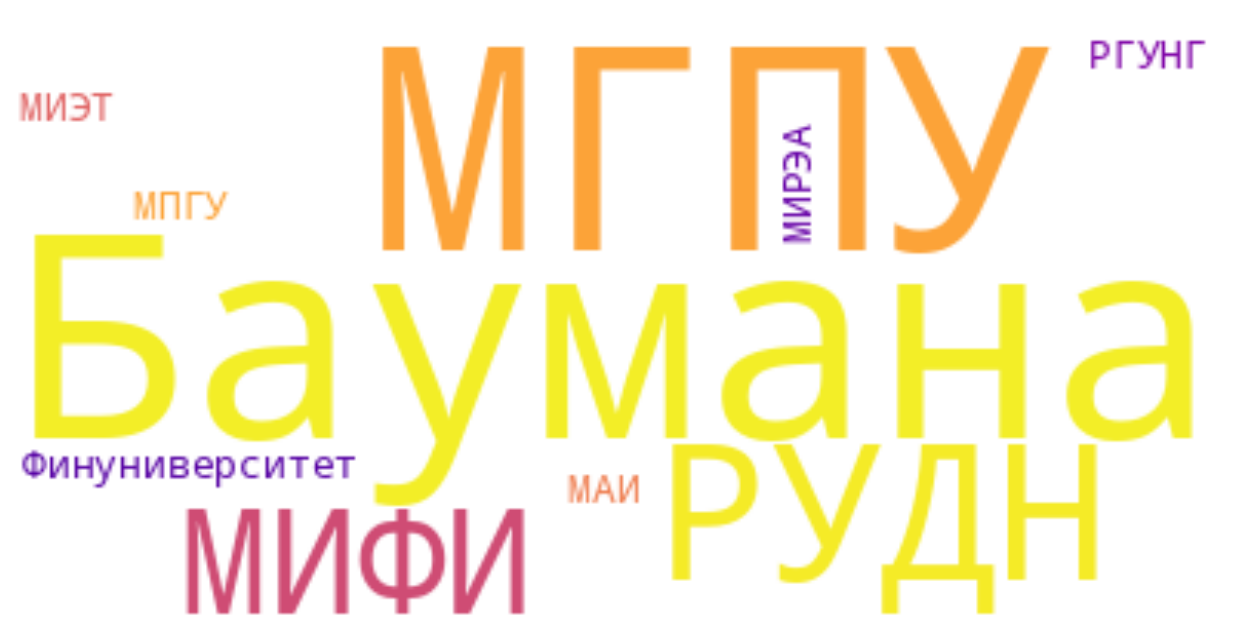

In [ ]:
# то же самое для мужчин:
url = 'https://mrsss.nagradion.ru/tournament39229'
response = requests.get(url)
encoding = chardet.detect(response.content)['encoding']
html = response.content.decode(encoding)
soup = BeautifulSoup(html, 'lxml')

html_mteams = soup.find_all('tr')
mteams = []
for i in html_mteams[1:11]:
  mteams.append(i.text.split()[-2][:-6])

mtext = " ".join(mteams)
mwordcloud = WordCloud(
    width=400,
    height=200,
    background_color='white',
    colormap='plasma',
    margin=5,
    font_path=None,
).generate(mtext)

plt.figure(figsize=(20, 8))
plt.imshow(mwordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()